# MACHINE LEARNING AND ENGINEERING APPLICATIONS
<hr style="height:3px;border:none;color:stillblue;background-color:black;" />
### Technical PhD seminar series at Chair for Computer Aided Architectural Design (CAAD), ETH Zurich


[Vahid Moosavi](https://vahidmoosavi.com/)
<hr style="height:1px;border:none;color:stillblue;background-color:black;" />

<a></a>

# First Session: Introduction 
<hr style="height:1px;border:none;color:stillblue;background-color:steelblue;" />
<hr style="height:1px;border:none;color:stillblue;background-color:black;" />

<span style="color:steelblue;font-size: 1em;"> 20 February 2018</span>

In [29]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
pd.__version__
import sys
%matplotlib inline

# Great success stories and now a hype around machine learning!

## Image segmentation and semantic labeling

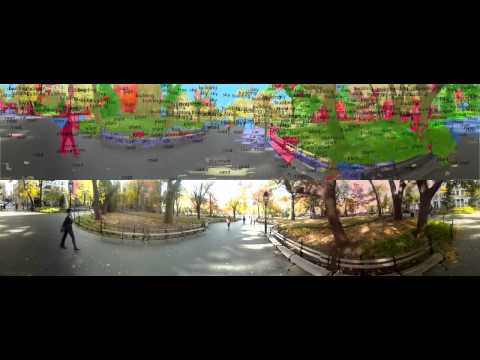

In [19]:
from IPython.display import YouTubeVideo
YouTubeVideo('ZJMtDRbqH40',width=700, height=600)

### Sketch_RNN
https://magenta.tensorflow.org/sketch-rnn-demo



### Generative Adverserial Networks (GAN) (very active area!)

#### Interpolations and generation from the learned latent space
[BEGAN: Boundary Equilibrium Generative Adversarial Networks](https://arxiv.org/pdf/1703.10717.pdf) 
![](Images/BEGAN.png)



#### 25k 19th century portraits; results seem good. These people have never existed:
![](Images/GAN_Port.jpg)
credit:https://twitter.com/pleonard/status/914671877146206208


# Why this is happening now?

![](Images/Computational Capacities.png)



### Big Data 
### Computational Power, and technologies such as GPUs
### At the conceptual level, machine learning algorithms have been the same over the last 50 years!

<hr style="height:5px;border:none;color:stillblue;background-color:steelblue;" />	
## A quick historical view to the main computational trends
### by Google N-gram Viewer

In [69]:
import datetime
import pandas as pd
# import pandas.io.data
import numpy as np
from matplotlib import pyplot as plt
import sys
import getngrams as ng# from pandas import Series, DataFrame
# import xkcd as fun
%matplotlib inline


kw = ['Differential Equations','Cellular Automata','Machine Learning']
A = pd.DataFrame()
for i in range(len(kw)):
    try: 
        tmp = ng.runQuery('-nosave -noprint -startYear=1800 -smoothing=3 -endYear=2008 -caseInsensitive '+kw[i])
#         A['year']=tmp.year.values[:]
        weights = tmp.values[:,1:]
        mx  = np.max(weights,axis=0)
        mn  = np.min(weights,axis=0)
        R = mx-mn
        weights = (weights-mn)/R
        tmp.loc[:,1:]=weights
        A[kw[i]]=tmp.values[:,1]

    except:
        print kw[i], 'not enough data'


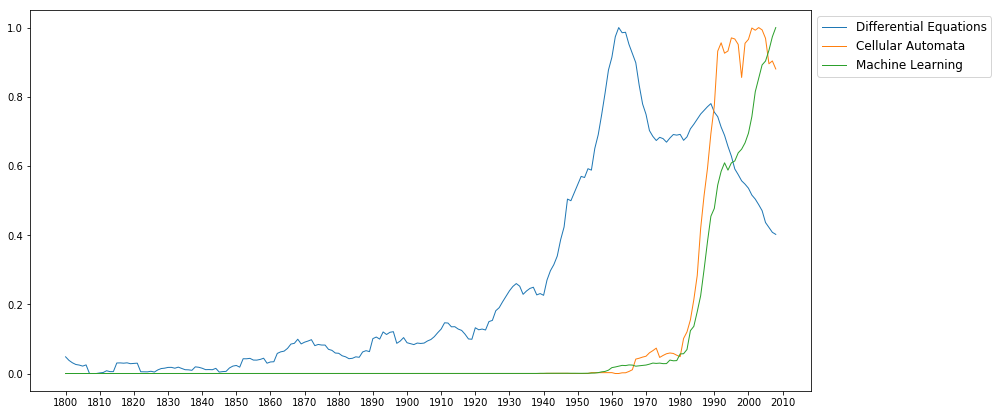

In [70]:
fig = plt.figure()
for i in range(len(kw)):
    try: 
        plt.plot(tmp.year,A[kw[i]],linewidth=1,label=kw[i])
        xticks = np.arange(tmp.year[0],2011,10).astype(int)
        plt.xticks(xticks)
#         plt.yticks([])
    except:
        print kw[i], 'not enough data'

# 
plt.legend(loc='best',bbox_to_anchor = (1.0, 1.0),fontsize = 'large')
fig.set_size_inches(14,7)


# What is the main shift?
# Theory Driven Vs. Data Driven Modeling?
![](Images/Theory_Data_Modeling.png)

<a></a>
<a></a>

# What is the main shift?


## Rational representation   VS.    encapsulation
## One descriptive model   VS. probablistic combination of many  models
## One section VS. many glued sections

![](Images/SOMdot.png)

## If the rational line is the domain expertise, data driven models are abstracting from them.

# Therefore, we might have a different view to the classical disciplines?!



![](Images/orthogonal.png)
#### Adopted from the original ideas of General Systems Theory



<hr style="height:5px;border:none;color:stillblue;background-color:steelblue;" />	
<a></a>
<a></a>

# What is the main shift?
# An inversion in the concept of scientific modeling


### <a></a>



## Classical approach:
![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/78/Double-Pendulum.svg/294px-Double-Pendulum.svg.png)


![](Images/Double_P.svg)




# Equation based
# Rule based
# Based on Idealization
<a></a>

In [31]:
# Double pendulum formula translated from the C code at
# http://www.physics.usyd.edu.au/~wheat/dpend_html/solve_dpend.c

from numpy import sin, cos
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation

G = 9.8  # acceleration due to gravity, in m/s^2
L1 = 1.0  # length of pendulum 1 in m
L2 = 0.7 # length of pendulum 2 in m
M1 = 1.0  # mass of pendulum 1 in kg
M2 = 1.0  # mass of pendulum 2 in kg


def derivs(state, t):

    dydx = np.zeros_like(state)
    dydx[0] = state[1]

    del_ = state[2] - state[0]
    den1 = (M1 + M2)*L1 - M2*L1*cos(del_)*cos(del_)
    dydx[1] = (M2*L1*state[1]*state[1]*sin(del_)*cos(del_) +
               M2*G*sin(state[2])*cos(del_) +
               M2*L2*state[3]*state[3]*sin(del_) -
               (M1 + M2)*G*sin(state[0]))/den1

    dydx[2] = state[3]

    den2 = (L2/L1)*den1
    dydx[3] = (-M2*L2*state[3]*state[3]*sin(del_)*cos(del_) +
               (M1 + M2)*G*sin(state[0])*cos(del_) -
               (M1 + M2)*L1*state[1]*state[1]*sin(del_) -
               (M1 + M2)*G*sin(state[2]))/den2

    return dydx

# create a time array from 0..100 sampled at 0.05 second steps
dt = 0.05
t = np.arange(0.0, 30, dt)

# th1 and th2 are the initial angles (degrees)
# w10 and w20 are the initial angular velocities (degrees per second)
th1 = 120.0
w1 = 0.0
th2 = -10.0
w2 = 0.0

# initial state
state = np.radians([th1, w1, th2, w2])

# integrate your ODE using scipy.integrate.
y = integrate.odeint(derivs, state, t)

x1 = L1*sin(y[:, 0])
y1 = -L1*cos(y[:, 0])

x2 = L2*sin(y[:, 2]) + x1
y2 = -L2*cos(y[:, 2]) + y1

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
ax.grid()

line, = ax.plot([], [], 'o-r',markersize=3, lw=2)
trace1, = ax.plot([], [], '-', c='r',lw=.4)
trace2, = ax.plot([], [], '-', c='g',lw=.4)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)


def init():
    line.set_data([], [])
    trace1.set_data([], [])
    trace2.set_data([], [])
    time_text.set_text('')
    return line, time_text


def animate(i):
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]

    line.set_data(thisx, thisy)
    trace1.set_data(x1[:i], y1[:i])
    trace2.set_data(x2[:i], y2[:i])
    time_text.set_text(time_template % (i*dt))
    return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(y)),
                              interval=25, blit=True, init_func=init)

# ani.save('./Images/double_pendulum.mp4', fps=15)
ani.save('./Images/double_pendulum.mp4', fps=15, extra_args=['-vcodec', 'libx264'],dpi=200)
plt.close()

In [32]:
from IPython.display import HTML
HTML("""
<video width="600" height="400" controls>
  <source src="files/Images/double_pendulum.mp4" type="video/mp4">
</video>
""")



<hr style="height:5px;border:none;color:stillblue;background-color:steelblue;" />	

# A game changer idea
## Least square method (1801 Gauss)
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/8de16f280e8444dbfb086fecd842eaedd7e2d9f5)

<span style="color:red;font-size: 2em;line-height: 100%;"> 
And the whole field of machine learning is about how to find a good f. </span>


<span style="color:red;font-size: 2em;line-height: 100%;"> 
Note that the final model is not necessarily representational </span>
<hr style="height:5px;border:none;color:stillblue;background-color:steelblue;" />	


In [33]:
N = 400
x1= np.random.normal(loc=17,scale=5,size=N)[:,np.newaxis]
x2= np.random.normal(loc=0,scale=5,size=N)[:,np.newaxis]
y = 3*x1 + np.random.normal(loc=.0, scale=.4, size=N)[:,np.newaxis]

# x1 = np.random.uniform(size=N)[:,np.newaxis]
# y = np.sin(2*np.pi*x1**3)**3 + .1*np.random.randn(*x1.shape)

y =-.1*x1**3 + 2*x1*x1 + 2*np.sqrt(x1)+ 10*np.random.normal(loc=30.0, scale=4.7, size=len(x1))[:,np.newaxis]


# fig = plt.figure(figsize=(7,7))
# ax1= plt.subplot(111)
# plt.plot(x1,y,'.r',markersize=5,alpha=1 );
def polynomial_regr(degree=1):
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn import linear_model
    
    
    
    X_tr = x1[:].astype(float)
    y_tr = y[:].astype(float)
    
#     X_ts = x1[150:]
#     y_ts = y[150:]
    
    poly = PolynomialFeatures(degree=degree)
    X_tr_ = poly.fit_transform(X_tr)
#     X_ts_ = poly.fit_transform(X_ts)
    
    regr = linear_model.LinearRegression()
    regr.fit(X_tr_, y_tr)
    
    
    y_pred_tr = regr.predict(X_tr_)[:]
#     y_pred_ts = regr.predict(X_ts_)[:]
    # Predicting the training data
    plt.plot(X_tr,y_tr,'.r',markersize=10,alpha=.4 );
    plt.plot(X_tr,y_pred_tr,'.b',markersize=10,alpha=.4 );
from ipywidgets import interact, HTML, FloatSlider
interact(polynomial_regr,degree=(1,50,1));

interactive(children=(IntSlider(value=1, description=u'degree', max=50, min=1), Output()), _dom_classes=('widget-interact',))

# What is the main shift?

<span style="color:red;font-size: 3em;line-height: 100%;"> 
Machine learning as a type of probabilistic programming </span>

# Or Machine Learning as Differentiable Programming!?

# Here, the rules are not hard-coded any longer in our computer program, but the program itself learns them

![](Images/probabilistic_Logical_network.png)

<hr style="height:5px;border:none;color:stillblue;background-color:steelblue;" />	

# But how to learn machine learning as a non-computer scientist?
## 0- Definitely not pedagogical! 
## 1- Think about it like learning a new language
* **A bit of structure and grammer**

## 2- Project oriented rather method (technique) oriented 
## 3- Guessing, hacking and copy-pasting! (plug and play machine learning)
<a></a>
<a></a>

![](Images/DataDrivenModelingKW.png)

<hr style="height:5px;border:none;color:stillblue;background-color:steelblue;" />
<hr style="height:5px;border:none;color:stillblue;background-color:steelblue;" />
# Important Terms
## (try to look at their Wikipedia entries)

## Supervised Learning
## Unsupervised Learning
## Reinforcement Learning


## Prediction/Function Approximation
## Regression
## Classification
## Pattern recognition
## Clustering
## Density Learning
## Manifold Learning
## Space transformation
## Latent space
## law of large numbers
## Curse of dimensionality
## Generalization
## Bias variance
## Loss function
## Gradient Descent
## Back-Propagation
## Similarity measures
## Feature Enginerring
## Representation Learning


<hr style="height:5px;border:none;color:stillblue;background-color:steelblue;" />
<hr style="height:5px;border:none;color:stillblue;background-color:steelblue;" />
# Main techniques
## Ensembles for Classification and Predictions
## Self Organizing Maps and Dimensionality Reduction Techniques
## PCA and Deep Auto-Encoders
## Multi-Layer Perceptron 
## Convolutional Neural Networks
## Recurrent Neural Networks


In [79]:
import datetime
import pandas as pd
# import pandas.io.data
import numpy as np
from matplotlib import pyplot as plt
import sys
import getngrams as ng# from pandas import Series, DataFrame
# import xkcd as fun
%matplotlib inline


kw = [
      'Supervised Learning',
      'Unsupervised Learning',
      'Reinforcement Learning',
      
#       'Function Approximation',
#       'Regression',
#       'classification',
#       'Pattern recognition',
#       'Clustering',
     
      
    
#       'Latent space',
#       'law of large numbers',
#       'Curse of dimensionality',
#       'Loss function',
#       'Gradient Descent',
#       'Back-Propagation',
#       'Feature Enginerring',
#       'Representation Learning',
     
#       'Auto Encoders',
#       'Self Organizing Maps',
#       'Random Forest',
#       'Multi Layer Perceptron',
#       'Recurrent Neural Networks',
#       'Convolution',      
      
     ]
A = pd.DataFrame()
for i in range(len(kw)):
    try: 
        tmp = ng.runQuery('-nosave -noprint -startYear=1800 -smoothing=3 -endYear=2008 -caseInsensitive '+kw[i])
#         A['year']=tmp.year.values[:]
        weights = tmp.values[:,1:]
        mx  = np.max(weights,axis=0)
        mn  = np.min(weights,axis=0)
        R = mx-mn
        weights = (weights-mn)/R
        tmp.loc[:,1:]=weights
        A[kw[i]]=tmp.values[:,1]

    except:
        print kw[i], 'not enough data'

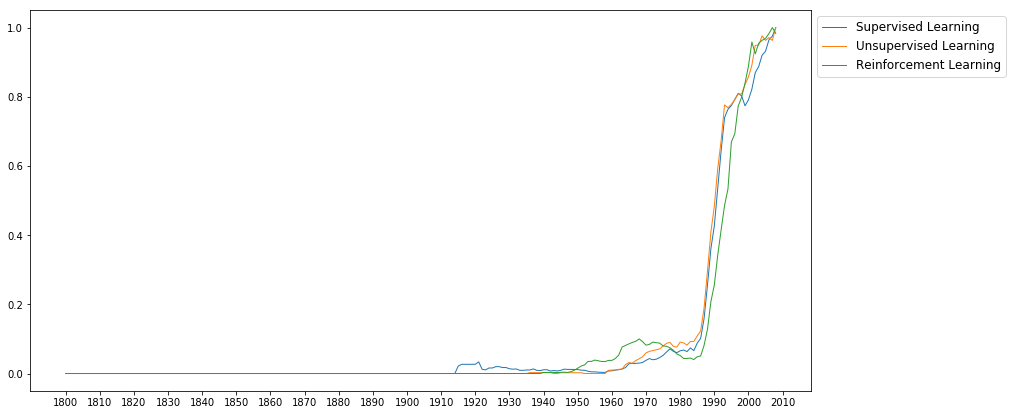

In [80]:
fig = plt.figure()
for i in range(len(kw)):
    try: 
        plt.plot(tmp.year,A[kw[i]],linewidth=1,label=kw[i])
        xticks = np.arange(tmp.year[0],2011,10).astype(int)
        plt.xticks(xticks)
#         plt.yticks([])
    except:
        print kw[i], 'not enough data'

# 
plt.legend(loc='best',bbox_to_anchor = (1.0, 1.0),fontsize = 'large')
fig.set_size_inches(14,7)

In [81]:
import datetime
import pandas as pd
# import pandas.io.data
import numpy as np
from matplotlib import pyplot as plt
import sys
import getngrams as ng# from pandas import Series, DataFrame
# import xkcd as fun
%matplotlib inline


kw = [
#       'Supervised Learning',
#       'Unsupervised Learning',
#       'Reinforcement Learning',
      
      'Function Approximation',
      'Regression',
      'classification',
      'Pattern recognition',
      'Clustering',
     
      
    
#       'Latent space',
#       'law of large numbers',
#       'Curse of dimensionality',
#       'Loss function',
#       'Gradient Descent',
#       'Back-Propagation',
#       'Feature Enginerring',
#       'Representation Learning',
     
#       'Auto Encoders',
#       'Self Organizing Maps',
#       'Random Forest',
#       'Multi Layer Perceptron',
#       'Recurrent Neural Networks',
#       'Convolution',      
      
     ]
A = pd.DataFrame()
for i in range(len(kw)):
    try: 
        tmp = ng.runQuery('-nosave -noprint -startYear=1800 -smoothing=3 -endYear=2008 -caseInsensitive '+kw[i])
#         A['year']=tmp.year.values[:]
        weights = tmp.values[:,1:]
        mx  = np.max(weights,axis=0)
        mn  = np.min(weights,axis=0)
        R = mx-mn
        weights = (weights-mn)/R
        tmp.loc[:,1:]=weights
        A[kw[i]]=tmp.values[:,1]

    except:
        print kw[i], 'not enough data'


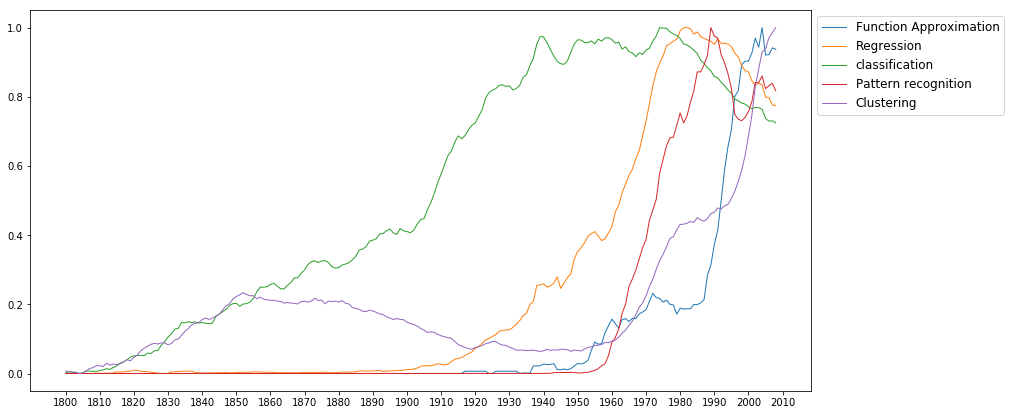

In [82]:
fig = plt.figure()
for i in range(len(kw)):
    try: 
        plt.plot(tmp.year,A[kw[i]],linewidth=1,label=kw[i])
        xticks = np.arange(tmp.year[0],2011,10).astype(int)
        plt.xticks(xticks)
#         plt.yticks([])
    except:
        print kw[i], 'not enough data'

# 
plt.legend(loc='best',bbox_to_anchor = (1.0, 1.0),fontsize = 'large')
fig.set_size_inches(14,7)

In [83]:
import datetime
import pandas as pd
# import pandas.io.data
import numpy as np
from matplotlib import pyplot as plt
import sys
import getngrams as ng# from pandas import Series, DataFrame
# import xkcd as fun
%matplotlib inline


kw = [
#       'Supervised Learning',
#       'Unsupervised Learning',
#       'Reinforcement Learning',
      
#       'Function Approximation',
#       'Regression',
#       'classification',
#       'Pattern recognition',
#       'Clustering',
     
      
    
      'Latent space',
      'law of large numbers',
      'Curse of dimensionality',
      'Loss function',
      'Gradient Descent',
      'Back-Propagation',
      'Feature Enginerring',
      'Representation Learning',
     
#       'Auto Encoders',
#       'Self Organizing Maps',
#       'Random Forest',
#       'Multi Layer Perceptron',
#       'Recurrent Neural Networks',
#       'Convolution',      
      
     ]
A = pd.DataFrame()
for i in range(len(kw)):
    try: 
        tmp = ng.runQuery('-nosave -noprint -startYear=1800 -smoothing=3 -endYear=2008 -caseInsensitive '+kw[i])
#         A['year']=tmp.year.values[:]
        weights = tmp.values[:,1:]
        mx  = np.max(weights,axis=0)
        mn  = np.min(weights,axis=0)
        R = mx-mn
        weights = (weights-mn)/R
        tmp.loc[:,1:]=weights
        A[kw[i]]=tmp.values[:,1]

    except:
        print kw[i], 'not enough data'


Feature Enginerring not enough data


Feature Enginerring not enough data


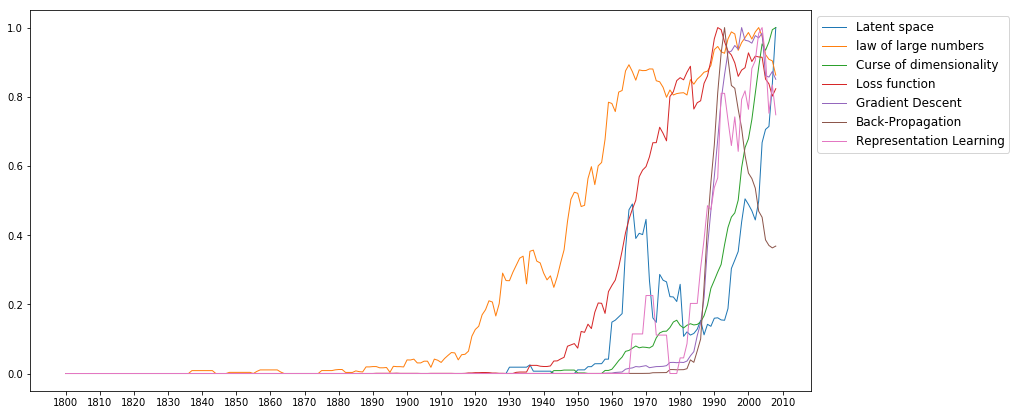

In [84]:
fig = plt.figure()
for i in range(len(kw)):
    try: 
        plt.plot(tmp.year,A[kw[i]],linewidth=1,label=kw[i])
        xticks = np.arange(tmp.year[0],2011,10).astype(int)
        plt.xticks(xticks)
#         plt.yticks([])
    except:
        print kw[i], 'not enough data'

# 
plt.legend(loc='best',bbox_to_anchor = (1.0, 1.0),fontsize = 'large')
fig.set_size_inches(14,7)

In [85]:
import datetime
import pandas as pd
# import pandas.io.data
import numpy as np
from matplotlib import pyplot as plt
import sys
import getngrams as ng# from pandas import Series, DataFrame
# import xkcd as fun
%matplotlib inline


kw = [
#       'Supervised Learning',
#       'Unsupervised Learning',
#       'Reinforcement Learning',
      
#       'Function Approximation',
#       'Regression',
#       'classification',
#       'Pattern recognition',
#       'Clustering',
     
      
    
#       'Latent space',
#       'law of large numbers',
#       'Curse of dimensionality',
#       'Loss function',
#       'Gradient Descent',
#       'Back-Propagation',
#       'Feature Enginerring',
#       'Representation Learning',
     
      'Auto Encoders',
      'Self Organizing Maps',
      'Random Forest',
      'Multi Layer Perceptron',
      'Recurrent Neural Networks',
      'Convolution', 
        'deep learning'
      
     ]
A = pd.DataFrame()
for i in range(len(kw)):
    try: 
        tmp = ng.runQuery('-nosave -noprint -startYear=1800 -smoothing=3 -endYear=2008 -caseInsensitive '+kw[i])
#         A['year']=tmp.year.values[:]
        weights = tmp.values[:,1:]
        mx  = np.max(weights,axis=0)
        mn  = np.min(weights,axis=0)
        R = mx-mn
        weights = (weights-mn)/R
        tmp.loc[:,1:]=weights
        A[kw[i]]=tmp.values[:,1]

    except:
        print kw[i], 'not enough data'


Auto Encoders not enough data


Auto Encoders not enough data


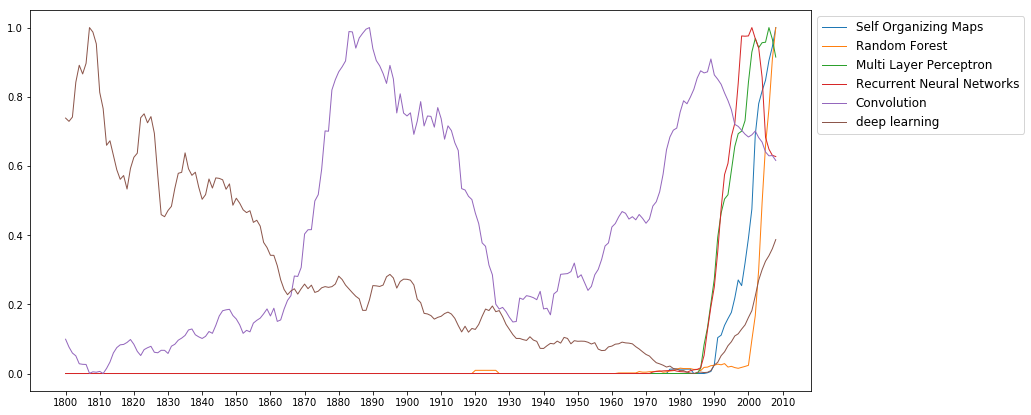

In [86]:
fig = plt.figure()
for i in range(len(kw)):
    try: 
        plt.plot(tmp.year,A[kw[i]],linewidth=1,label=kw[i])
        xticks = np.arange(tmp.year[0],2011,10).astype(int)
        plt.xticks(xticks)
#         plt.yticks([])
    except:
        print kw[i], 'not enough data'

# 
plt.legend(loc='best',bbox_to_anchor = (1.0, 1.0),fontsize = 'large')
fig.set_size_inches(14,7)

<hr style="height:5px;border:none;color:stillblue;background-color:steelblue;" />
<a></a>

<hr style="height:5px;border:none;color:stillblue;background-color:steelblue;" />

<hr style="height:5px;border:none;color:stillblue;background-color:steelblue;" />

# From the application point of view:
# When we use machine learning?
# How do we get the data?


<hr style="height:5px;border:none;color:stillblue;background-color:steelblue;" />	
# 1-Computational complexity or intractability in theory driven models
### such as Cpmputational Fluid Dynamics (CFD)
### Classicaly also called surrogate modeling or metamodeling or learning physics
### Urban Flood risk estimation: Water flow "emulation" to speed up slow physics based simulations
### Also should be possible for any types of fluid dynamics
<hr style="height:5px;border:none;color:stillblue;background-color:steelblue;" />

# 2- Highdimensional nonlinearity and interdependecies between variables
### Such as the interplay of form and forces
### Other fields: Teleconnections in atmospheric science

<hr style="height:5px;border:none;color:stillblue;background-color:steelblue;" />

# 3- Limits of representation or integration in multifaceted systems
### A lot of failure cases in 1960s with the so called "social physics"
### City traffic + air pollution + heat + … + human behavior 

<hr style="height:5px;border:none;color:stillblue;background-color:steelblue;" />
	
# 4- A lot of  unique socio-economic phenomena with no theory at all
### Health and place
### Global patterns of urbanism (urban science)
### Real estate market and urban economy



<hr style="height:5px;border:none;color:stillblue;background-color:steelblue;" />


### <a></a>
<hr style="height:3px;border:none;color:stillblue;background-color:black;" />
## The general set up of these seminar series:
### Get familiar with the state of the art in Machine Learning algorithms and applications.
### Engage in this field (if you see the promise) by focusing on your application of interest.
### <a></a>
### <a></a>
<hr style="height:3px;border:none;color:stillblue;background-color:black;" />

# For those who wants the credit for this course:
## Participate in all the lectures
## Come up with a good question from your domain that can be addressed by machine learning.


# Thanks! 